# Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '../data/raw/demand_orders.csv'
data = pd.read_csv(file_path)

# Display basic information and first few rows of the dataset
data_info = data.info()
data_head = data.head()
(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96474 entries, 0 to 96473
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   order_id   96474 non-null  object
 1   timestamp  96474 non-null  object
 2   sku_id     96474 non-null  int64 
 3   sku        96474 non-null  object
 4   price      96474 non-null  int64 
 5   qty        96474 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.4+ MB


(None,
    order_id            timestamp  sku_id        sku  price  qty
 0  07f5c674  2018-07-01 03:40:50       0  Router 64   1460    3
 1  de500260  2018-07-01 17:48:35       0  Router 64   1460    5
 2  548d1408  2018-07-01 23:45:30       0  Router 64   1460    4
 3  e924bc98  2018-07-02 18:39:46       0  Router 64   1460    4
 4  abf0324c  2018-07-03 01:04:02       0  Router 64   1460    6)

In [2]:
# Convert 'timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create 'total_price' column
data['total_price'] = data['price'] * data['qty']

# Extract year, month, day, hour and weekday from 'timestamp'
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['total_price'] = data['price'] * data['qty']
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month_name()
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['weekday'] = data['timestamp'].dt.day_name()



# Check the transformations

data.head()

# Check the transformations
data.head()

,order_id,timestamp,sku_id,sku,price,qty,total_price,year,month,day,hour,weekday
0,07f5c674,2018-07-01 03:40:50,0,Router 64,1460,3,4380,2018,July,1,3,Sunday
1,de500260,2018-07-01 17:48:35,0,Router 64,1460,5,7300,2018,July,1,17,Sunday
2,548d1408,2018-07-01 23:45:30,0,Router 64,1460,4,5840,2018,July,1,23,Sunday
3,e924bc98,2018-07-02 18:39:46,0,Router 64,1460,4,5840,2018,July,2,18,Monday
4,abf0324c,2018-07-03 01:04:02,0,Router 64,1460,6,8760,2018,July,3,1,Tuesday


# EDA
### In this case we are looking at:

    Seasonality: We will check seasonal trends by analyzing monthly and daily sales volumes.
    Most popular products: Let's determine which products are most popular among buyers.
    Time of day (time series graph, box with moustache, heat map): We investigate at what time of day purchases are most often made.

## Seasonality
To begin with, let's explore how sales are distributed by month and day. This will allow us to identify possible seasonal trends.

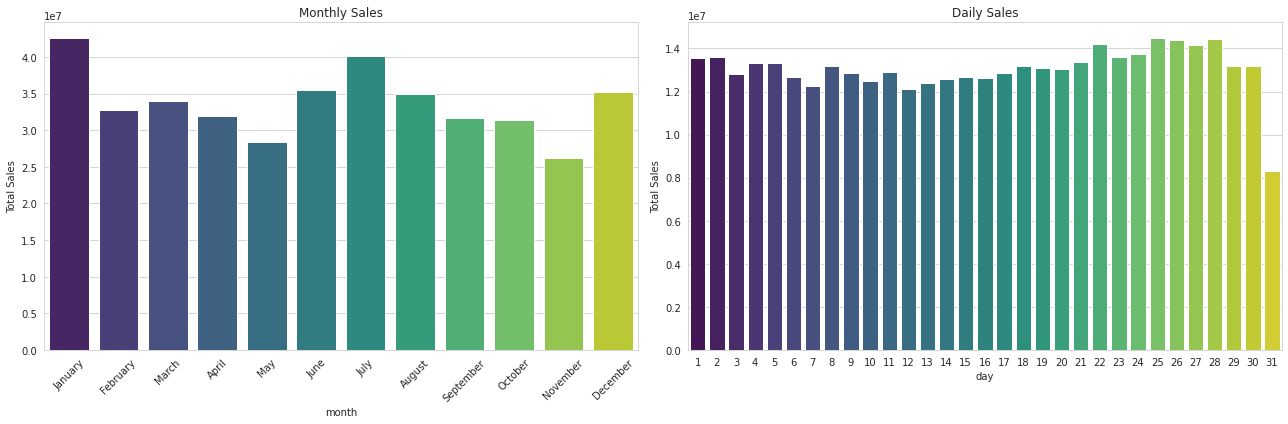

In [3]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 6))

# Monthly sales
plt.subplot(1, 2, 1)
monthly_sales = data.groupby('month')['total_price'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']
)
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.ylabel('Total Sales')

# Daily sales
plt.subplot(1, 2, 2)
daily_sales = data.groupby('day')['total_price'].sum()
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="viridis")
plt.title('Daily Sales')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


### Conclusion about seasonality
    Monthly sales:
        There are some fluctuations in the volume of sales in different months, but there is no obvious seasonality.
        A more detailed analysis may require data for a longer period of time to identify specific trends.
    Daily sales:
        Sales are distributed relatively evenly across the days of the month, with no obvious peaks or troughs.

## Popular products
Now let's determine which products are the most popular among buyers based on total sales and the number of units sold.

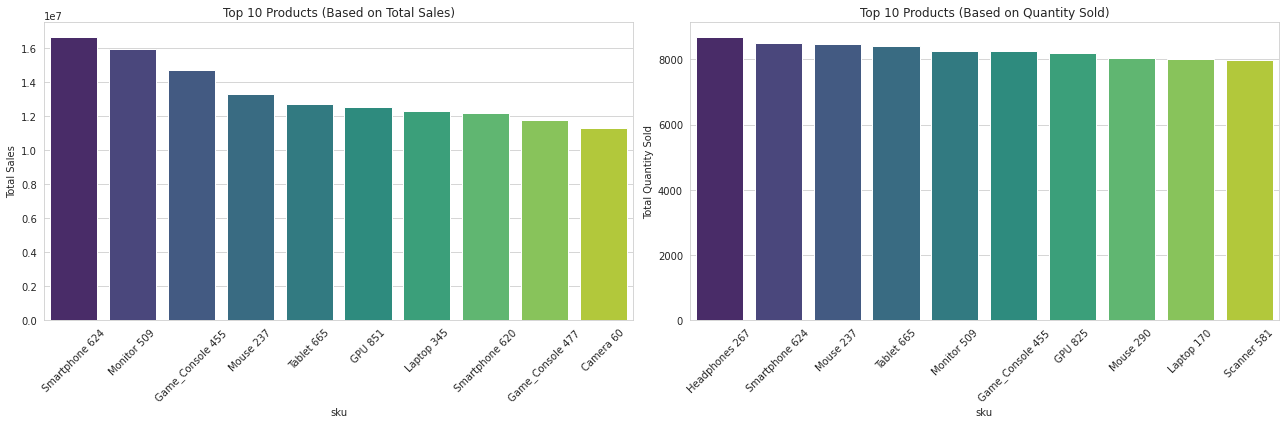

In [4]:
# Initialize the figure
plt.figure(figsize=(18, 6))

# Top 10 products based on total sales
plt.subplot(1, 2, 1)
top_products_sales = data.groupby('sku')['total_price'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products_sales.index, y=top_products_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Top 10 Products (Based on Total Sales)')
plt.ylabel('Total Sales')

# Top 10 products based on quantity sold
plt.subplot(1, 2, 2)
top_products_qty = data.groupby('sku')['qty'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products_qty.index, y=top_products_qty.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Top 10 Products (Based on Quantity Sold)')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()


### Conclusion about top 10 products

    Total sales and the number of units sold are closely related to each other, which is logical, since total sales are the product of price and quantity.
    There are certain products that clearly stand out in terms of sales volume and the number of units sold. These items are probably key SKUs for the business and should be especially closely monitored in terms of inventory management and pricing.

## Time of day

Now let's look at what time of day purchases are most often made. This can help us understand when buyers are most active.

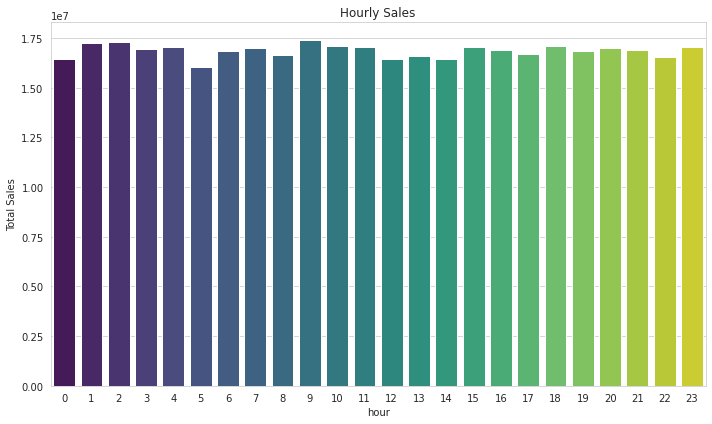

In [5]:
# Initialize the figure
plt.figure(figsize=(10, 6))

# Hourly sales
hourly_sales = data.groupby('hour')['total_price'].sum()
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="viridis")
plt.title('Hourly Sales')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


### Conclusion about sales by the hour

    Sales are evenly distributed

## Look at Boxplot for display the distribution of total sales by hour.

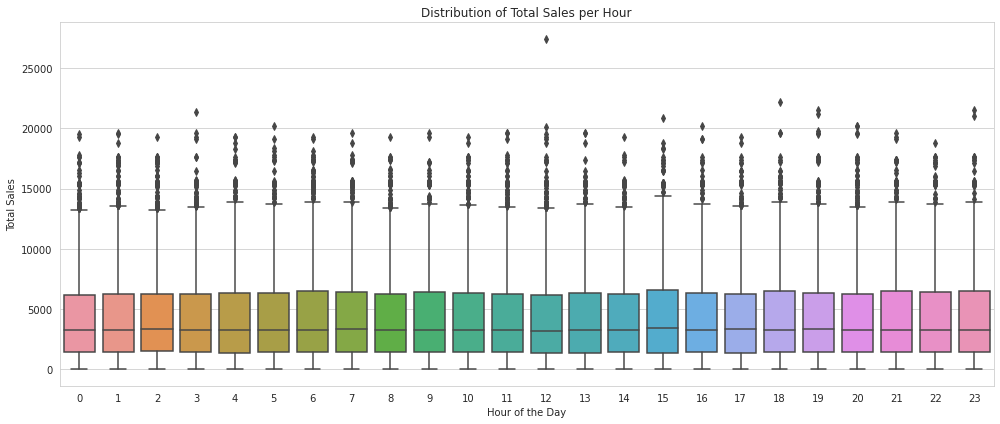

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# Boxplot for total sales per hour
sns.boxplot(x='hour', y='total_price', data=data)
plt.title('Distribution of Total Sales per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

### Conclusion about Boxplot Analysis:

    Distribution of sales: It can be seen that the median of total sales is mostly stable during the day, although there are some fluctuations.
    Outliers: There are some outliers, especially during popular shopping hours, which indicates the presence of individual orders with very high sales volume.
    Variation: More variation (wider "whiskers" on the chart) at some hours, especially in the afternoon, which indicates a greater variety of order sizes at this time.

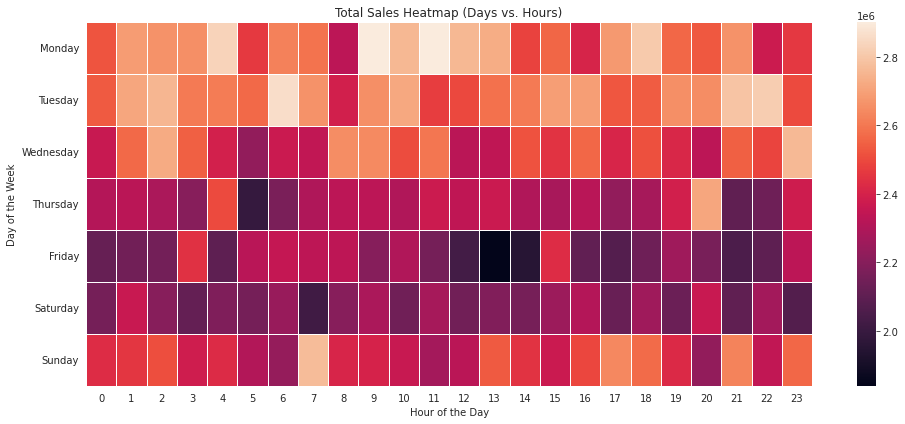

In [7]:
# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(data, values='total_price', 
                              index='weekday', 
                              columns='hour', 
                              aggfunc='sum', 
                              fill_value=0)

# Order the index (days of the week)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Initialize the figure
plt.figure(figsize=(14, 6))

# Create a heatmap
sns.heatmap(heatmap_data, linewidths=.5)
plt.title('Total Sales Heatmap (Days vs. Hours)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()


Heat map analysis:

    The most active hours: Peak sales hours on most days are at 15 and 18 hours.
    The most active weekday: On Sunday, Monday and Wednesday, there is a high activity of buyers at certain hours.
    Night/morning hours: Some sales are noticeable during the night and early morning hours, which may be an interesting insight for further study.

# General conclusion and insight about demand_orders 
Conclusion:

    Seasonality: There are no obvious seasonal trends, but there are some fluctuations in sales by month and day.
    Popular products: Key SKUs have been identified, which stand out both in terms of sales volume and the number of units sold.
    Time of day: Sales are evenly distributed
    The most active hours: at 15 and 18 hours.
    The most active weekday: On Sunday, Monday and Wednesday
    
Found insight:

    According to the heat map night/morning hours: Some sales are noticeable during the night and early morning hours, which may be an interesting insight for further study.